# Activity : Feature Engineering & Advanced Data Preprocessing - Titanic

### Overview

In our previous session, we navigated the Titanic dataset's depths, uncovering its nuances. Building on that foundation, this notebook delves into enhancing the data representation using advanced preprocessing techniques and feature engineering.

### Objective

The primary objective of this activity is to refine and transform the Titanic dataset, ensuring that it's not only clean but also structured in a way that highlights hidden patterns and relationships.

### What We Will Do:

1. **Data Quality Assessment:** Double-check our data's integrity. We'll look for duplicates and other anomalies that could distort our analysis.
2. **Encoding Categorical Variables:** Turn non-numerical columns into a model-compatible format. We'll explore both One-Hot and Label Encoding for columns like 'Embarked' and 'Sex'.
3. **Binning Continuous Variables:** Convert features such as 'Age' into categorical bins. This process can sometimes provide more meaningful insights than continuous variables.
4. **Log Transformation:** Apply this to features with skewed distributions, ensuring a more normalized data structure.
5. **Feature Scaling:** For algorithms sensitive to varying scales, like linear regression, we'll ensure that specific columns are standardized and normalized.
6. **Creating new feature:** Augment our dataset by crafting new features, enabling us to derive more profound insights from our data.

By the end of this activity, we'll have a dataset that's not just clean, but also more analytical and model-ready, setting the groundwork for our subsequent analyses and predictive modeling.

---

## 1. Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Label Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Feature scaling 
from sklearn.preprocessing import MinMaxScaler # for Normalization
from sklearn.preprocessing import StandardScaler # for Standardization

## 2. Loading the Dataset

- Load the Titanic dataset from `seaborn`

In [3]:
titanic_data = pd.read_csv("../data/titanic_preprocessed.csv")

## 3. Refresh and Review Dataset

**Objective:** Familiarize yourself with the dataset's structure and ensure it's ready for further analysis.

### 1. Dataset Overview

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### 2. Dataset Information

In [16]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


The dataset contains 11 columns. 

The data types are: 
- Int: `PassengerId` , `Survived`, `Pclass`, `SibSp`, `Parch`
- Float: `Age`, `Fare`
- Object : `Name`, `Sex`, `Embarked`

### 3. Statistical Summary

In [17]:
# Calculate summary statistics for numerical variables
print("\nSummary statistics for numerical variables:")
titanic_data.describe()


Summary statistics for numerical variables:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# Calculate summary statistics for categorical variables
print("\nSummary statistics categorical variables:")
titanic_data.describe(include=['object'])


Summary statistics categorical variables:


,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


### 4. Missing Values

In [19]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**=> all columns have no missing values.**

### 5. Duplicate Rows

In [20]:
titanic_data.duplicated().sum()

0

The `duplicated()` method returns a Series that indicates whether each row is a duplicate of a previous row in the dataset. Summing up this Series gives the total number of duplicate rows.

**=> there are no duplicate rows.**

---

## 4. Encoding Categorical Variables

**Objective:**
Transform categorical variables `sex` and `embarked` from the Titanic dataset into numeric format to make them suitable for machine learning models.

### 1. One-Hot Encoding for the `Embarked` Column

- One-hot encoding is used to convert the 'Embarked' column, which is a nominal categorical variable, into a format that can be provided to machine learning algorithms to do a better job in prediction.

- Since the `Embarked` column has values like `S`, `C`, and `Q`, one-hot encoding will result in three new columns, one for each of these values. Each row will have a `1` in the column corresponding to its 'Embarked' value and `0` in the other two.

- **Note:** The `pd.get_dummies()` function will create new columns named after the unique values of the `Embarked` column. When using `drop_first=True`, the first unique value column will be dropped to avoid multicollinearity.

In [22]:
# One-hot encoding for 'Embarked' column
one_hot_embarked = pd.get_dummies(titanic_data['Embarked'], prefix='Embarked', drop_first=True)
titanic_data = pd.concat([titanic_data, one_hot_embarked], axis=1)
titanic_data.drop('Embarked', axis=1, inplace=True)

### 2. Label Encoding for the `Sex` Column

- Label encoding is used to convert the `Sex` column into numeric values.

- Since `Sex` is a binary categorical variable (only two values: `male` and `female`), label encoding is suitable. After encoding, `male` might be represented as `1` and `female` as `0` (or vice-versa, depending on the order the encoder encounters the categories).

In [23]:
encoder = LabelEncoder()
# Label encoding for 'Sex' column
titanic_data['Sex'] = encoder.fit_transform(titanic_data['Sex'])

After these tasks, the dataset will have the 'Embarked' column replaced with `Embarked_Q` and `Embarked_S` columns due to one-hot encoding, and the `Sex` column will have numeric, 1 for `male` and 0 for `female`.

In [24]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1


---

## 5. Binning Continuous Variables

Binning is the process of converting continuous variables into discrete ones. This is done by segmenting the variable into bins or intervals. Binning can help in improving the accuracy of predictive models, especially when certain thresholds in continuous variables mark significant changes.

**Objective:**
In the Titanic dataset, the age of passengers is a continuous variable. For the purpose of better understanding patterns, we will segment the age into predefined bins.

### 1. Binning the `Age` column

1. **Defining the bin edges and labels**
   
   We first need to determine the age ranges for each category:
   - `Child`: 0 to 12 years
   - `Teenager`: 12 to 19 years
   - `Young Adult`: 19 to 30 years
   - `Adult`: 30 to 50 years
   - `Senior`: 50 to 100 years

   Accordingly, we define the bin edges and labels:
 

In [4]:
bin_edges = [0, 12, 19, 30, 50, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

2. **Performing the Binning**

   The `pd.cut()` function from pandas provides a straightforward way to segment and sort data values into bins. We'll use this function to categorize the `Age` data into the predefined bins.
   
   The `right=False` parameter ensures that the bin includes the left value but excludes the right value. For example, ages from 0 (inclusive) to 12 (exclusive) will be labeled as `Child`.

In [6]:
titanic_data['Age_Group'] = pd.cut(titanic_data['Age'], bins=bin_edges, labels=labels, right=False)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


**Results:**
After executing the code, the `titanic_data` DataFrame will have a new column named `Age_Group` containing the age categories for each passenger.

3. **Visualize a Bar plot of the Age_Group**

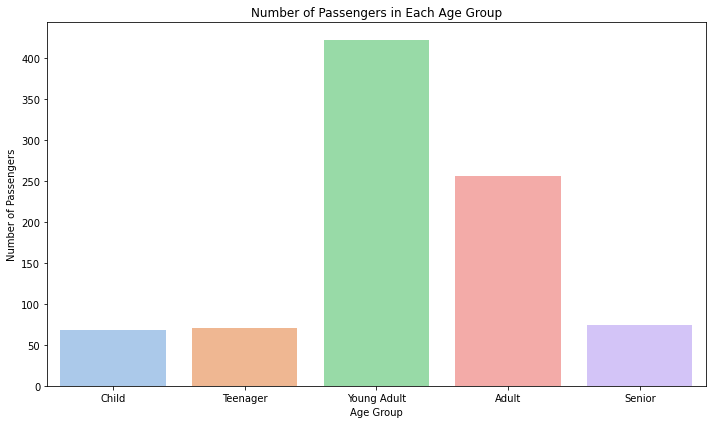

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_data, x='Age_Group', palette='pastel')
plt.title('Number of Passengers in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

From the chart, we can deduce which age group had the most and the least number of passengers aboard the Titanic. 

For instance, if 'Young Adult' has the tallest bar, it means most passengers were in the 19-30 age range. Such insights can further help in understanding the survival patterns across different age groups.

### 2. Visualizing Survival Rates by Age Group

**Objective:**
To gain deeper insights into the Titanic tragedy, it would be insightful to examine the survival rates across different age groups.

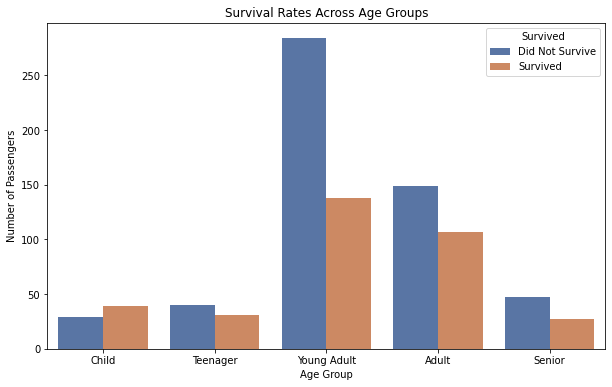

In [17]:
# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_data, x='Age_Group', hue='Survived', palette='deep')
plt.title('Survival Rates Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

- **Explanation**:

By visualizing the survival rates across different age groups, we can identify several patterns:
- The `Young Adult` and `Adult` age groups had a significant number of casualties.
- The `Child` and `Teenager` age groups have a higher survival rate compared to the other groups, especially when comparing the number of survivors to the total count in those groups.

- **Reflections:**

    - The chosen bin boundaries seem to effectively highlight patterns in survival rates across age groups. We can clearly see that children and teenagers had higher survival chances, which might be due to the **"Women and children first"** policy during the evacuation.
    - While the current binning provides valuable insights, different binning boundaries could emphasize other nuances in the data. For example, a narrower bin for very young children might highlight if infants and toddlers had even higher survival rates compared to older children. The choice of bin boundaries can be influenced by specific questions we're looking to answer and the stories we wish to uncover from the data.

---

## 6. Log Transformation for `Fare` Column 

**Objective:**
Transformations are a technique to stabilize variance, make the data more normal distribution-like, and improve the validity of measures of association. The `Fare` column in the Titanic dataset has a right-skewed distribution with a few large values which can be considered outliers. By applying a log transformation, we aim to reduce the impact of these outliers.

#### 1. Visualization of the distribution of the `Fare` column

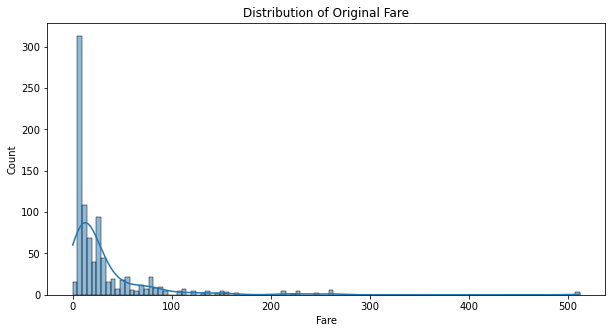

In [19]:
# Original Fare Histogram
plt.figure(figsize=(10, 5))
sns.histplot(titanic_data['Fare'], kde=True)
plt.title('Distribution of Original Fare')
plt.show()

- The original `Fare` column has a right-skewed distribution with a few large values that can be considered outliers. The tail of the distribution is long, stretching out to the right.

#### 2. Apply a log transformation to the `Fare` column:

In [24]:
# Applying the log transformation
titanic_data['Log_Fare'] = np.log1p(titanic_data['Fare'])

#### 4. Visualization of the transformed Fare column

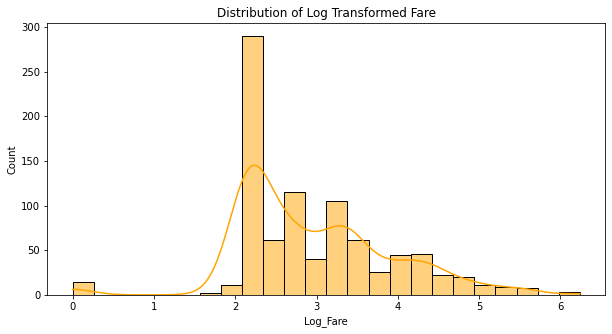

In [21]:
# Transformed Fare Histogram
plt.figure(figsize=(10, 5))
sns.histplot(titanic_data['Log_Fare'], kde=True, color='orange')
plt.title('Distribution of Log Transformed Fare')
plt.show()

- After the log transformation, the distribution appears much more bell-shaped and closer to a normal distribution.

#### 5. Side-by-side comparison of histograms

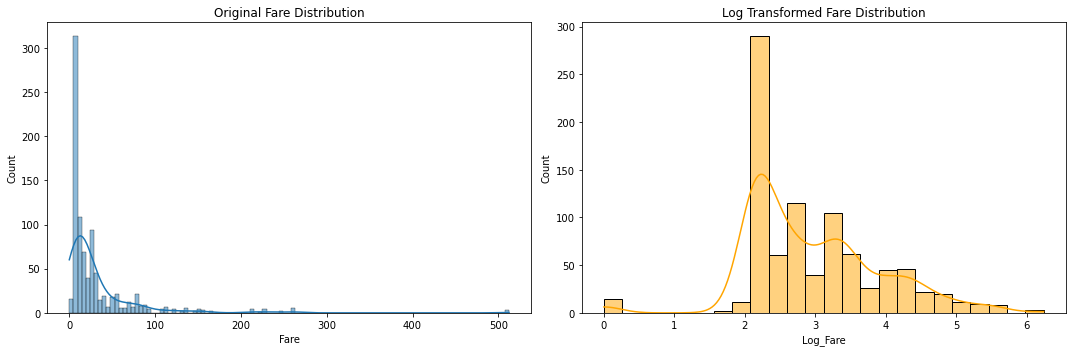

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(titanic_data['Fare'], kde=True, ax=axes[0])
axes[0].set_title('Original Fare Distribution')

sns.histplot(titanic_data['Log_Fare'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Log Transformed Fare Distribution')

plt.tight_layout()
plt.show()

- The side-by-side histograms visually emphasize how the transformation brings out the main bulk of the data and lessens the effect of the long tail on the right.

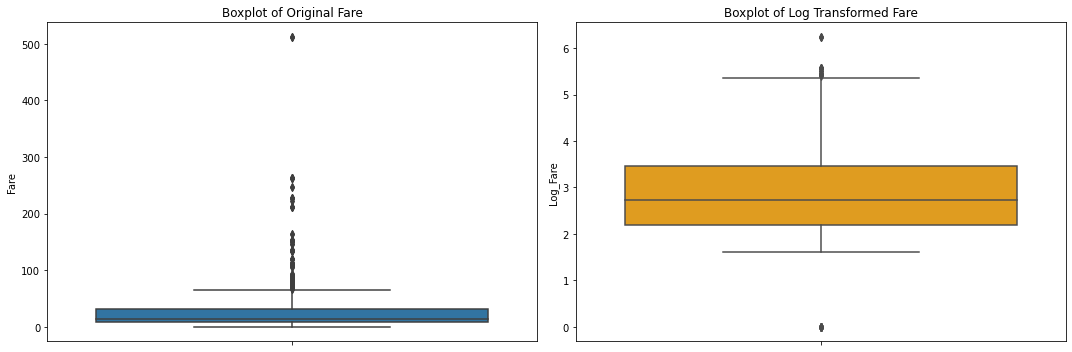

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.boxplot(y=titanic_data['Fare'], ax=axes[0])
axes[0].set_title('Boxplot of Original Fare')

sns.boxplot(y=titanic_data['Log_Fare'], ax=axes[1], color='orange')
axes[1].set_title('Boxplot of Log Transformed Fare')

plt.tight_layout()
plt.show()


- From the boxplots, it's evident that the log transformation has reduced the impact of the outliers. The original Fare boxplot shows several points outside the "whiskers," indicating potential outliers. The transformed boxplot still shows some outliers, but they're less pronounced than before.

---

## 7. Feature Scaling

**Feature Scaling: An Introduction**

Feature scaling is an essential data preprocessing step when working with machine learning algorithms. It aims to normalize the range of independent variables or features of the data. In simpler terms, it's about getting different variables to be on similar scales so no particular variable dominates others when feeding data to the model.

There are mainly two types of feature scaling: 
 
1. **Normalization (Min-Max Scaling):** This method scales the features such that they have values between 0 and 1.

$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

2. **Standardization (Z-score normalization):** This method scales the features such that they have a mean of 0 and a standard deviation of 1.

$$X_{standard} = \frac{X - \mu}{\sigma}$$

Where:
- $X$ is the original feature vector
- $\mu$ is the mean of the feature vector
- $\sigma$ is its standard deviation


**Why is Feature Scaling Important?**

- Some algorithms, like gradient descent and algorithms that use distance measures like k-nearest neighbors (k-NN) or support vector machines (SVM), converge faster or are more accurate when features are on a relatively similar scale.
  
- It ensures that just because some features are big in magnitude doesn't mean they act as the main features in predictive models.

### 1.  Normalization of `Age` & `Fare`

**Objective:** Normalize the `Age` and `Fare` columns of the Titanic dataset.

To normalize the `Age` and `Fare` columns, we'll use the `MinMaxScaler` from `sklearn.preprocessing`. This scaler will transform the data to fit within the range of [0,1].

In [36]:
# Apply normalization
scaler = MinMaxScaler()
titanic_data[['Age_normalized', 'Fare_normalized']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Display the first few rows to check the new columns
titanic_data[['Age', 'Age_normalized', 'Fare', 'Fare_normalized']].head()

,Age,Age_normalized,Fare,Fare_normalized
0,22.0,0.271174,7.2500,0.014151
1,38.0,0.472229,71.2833,0.139136
2,26.0,0.321438,7.9250,0.015469
3,35.0,0.434531,53.1000,0.103644
4,35.0,0.434531,8.0500,0.015713


After applying the `MinMaxScaler`, the `Age` and `Fare` columns will have their values transformed to lie within the range [0,1], and these normalized values will be stored in the columns `Age_normalized` and `Fare_normalized`.

### 2. Standardization of `Age` & `Fare`

**Objective:** Standardize the Age and Fare columns of the Titanic dataset.

For standardizing the data such that they have a mean of 0 and a standard deviation of 1, we'll utilize the `StandardScaler` from `sklearn.preprocessing`.

In [38]:
# Apply standardization
scaler = StandardScaler()
titanic_data[['Age_standardized', 'Fare_standardized']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Display the first few rows to check the new columns
titanic_data[['Age', 'Age_standardized', 'Fare', 'Fare_standardized']].head()

,Age,Age_standardized,Fare,Fare_standardized
0,22.0,-0.592481,7.2500,-0.502445
1,38.0,0.638789,71.2833,0.786845
2,26.0,-0.284663,7.9250,-0.488854
3,35.0,0.407926,53.1000,0.420730
4,35.0,0.407926,8.0500,-0.486337


Post application of the `StandardScaler`, the `Age` and `Fare` columns will be centered around the mean (0) with a standard deviation of 1. These standardized values are then stored in the columns `Age_standardized` and `Fare_standardized`.

### Visual Comparison

We'll plot histograms using `seaborn` to visually compare the distributions of the original and scaled values of `Age` and `Fare`.

- For `Age`

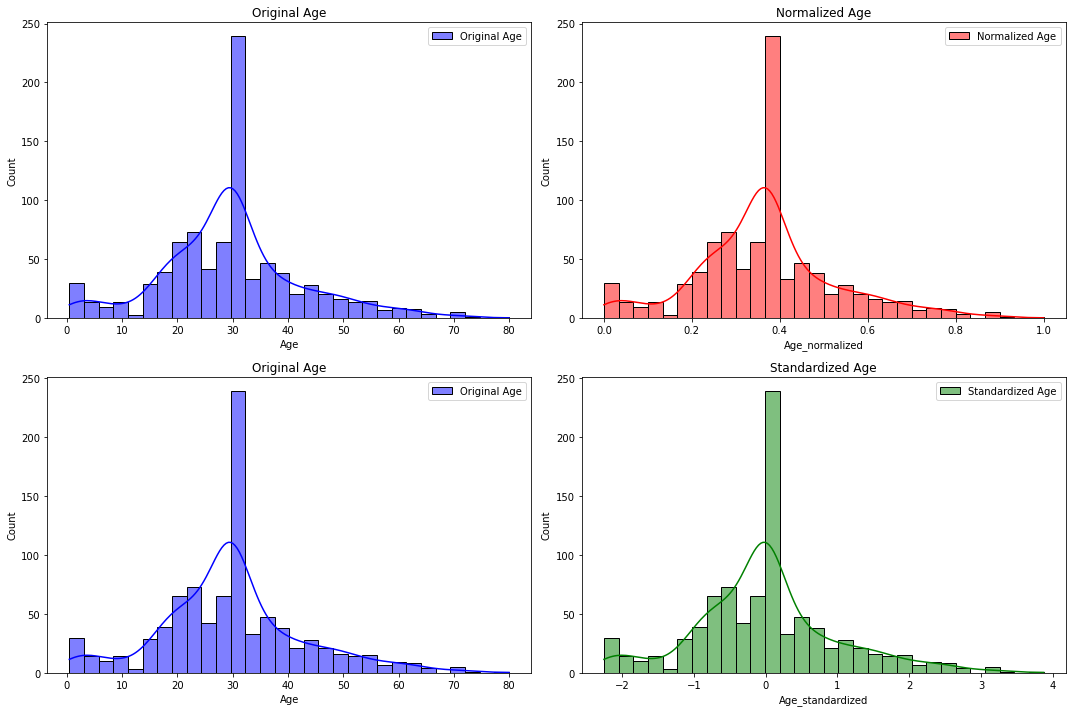

In [43]:
# Setting up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Original vs. Normalized Age
sns.histplot(titanic_data['Age'], color='blue', label='Original Age', kde=True, ax=axs[0,0], alpha=0.5)
axs[0,0].legend()
axs[0,0].set_title('Original Age')

sns.histplot(titanic_data['Age_normalized'], color='red', label='Normalized Age', kde=True, ax=axs[0,1], alpha=0.5)
axs[0,1].legend()
axs[0,1].set_title('Normalized Age')

# Original vs. Standardized Age
sns.histplot(titanic_data['Age'], color='blue', label='Original Age', kde=True, ax=axs[1,0], alpha=0.5)
axs[1,0].legend()
axs[1,0].set_title('Original Age')

sns.histplot(titanic_data['Age_standardized'], color='green', label='Standardized Age', kde=True, ax=axs[1,1], alpha=0.5)
axs[1,1].legend()
axs[1,1].set_title('Standardized Age')

plt.tight_layout()
plt.show()


- For Fare: 

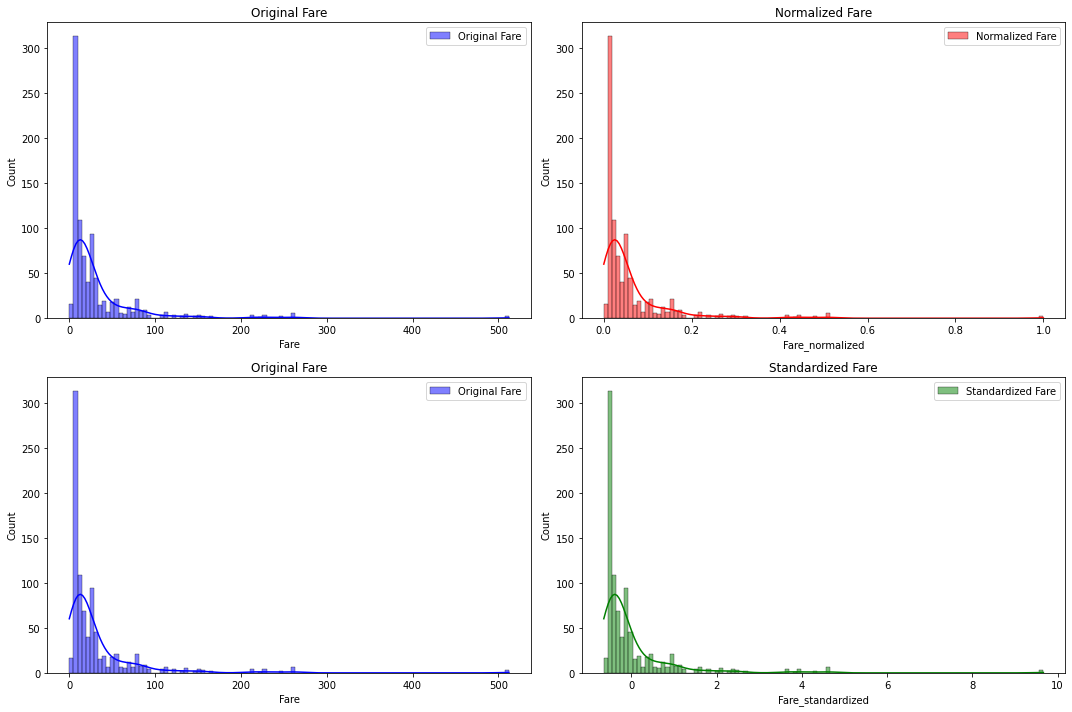

In [44]:
# Setting up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Original vs. Normalized Fare
sns.histplot(titanic_data['Fare'], color='blue', label='Original Fare', kde=True, ax=axs[0,0], alpha=0.5)
axs[0,0].legend()
axs[0,0].set_title('Original Fare')

sns.histplot(titanic_data['Fare_normalized'], color='red', label='Normalized Fare', kde=True, ax=axs[0,1], alpha=0.5)
axs[0,1].legend()
axs[0,1].set_title('Normalized Fare')

# Original vs. Standardized Fare
sns.histplot(titanic_data['Fare'], color='blue', label='Original Fare', kde=True, ax=axs[1,0], alpha=0.5)
axs[1,0].legend()
axs[1,0].set_title('Original Fare')

sns.histplot(titanic_data['Fare_standardized'], color='green', label='Standardized Fare', kde=True, ax=axs[1,1], alpha=0.5)
axs[1,1].legend()
axs[1,1].set_title('Standardized Fare')

plt.tight_layout()
plt.show()

From the plots, we can observe that the shape of the distribution remains the same for both `normalization` and `standardization`. However, the scales differ. `Normalization` shifts the scale to [0,1], whereas `standardization` centers the data around a mean of 0.

### Conclusions on Feature Scaling Techniques

#### Normalization:

- Normalization scales numeric features to a specified range, typically [0,1], ensuring that no feature disproportionately influences the model because of its numerical scale.
  
- After applying normalization to the `Age` and `Fare` columns, values are adjusted to lie between 0 and 1.

- The distribution's shape remains consistent post-normalization, but the scale is compressed to fit within the [0,1] interval.

#### Standardization:

- Standardization is favored when algorithms require features to be centered around zero or when the data follows a Gaussian distribution.

- Post standardization, both `Age` and `Fare` columns exhibit a mean close to 0 and a standard deviation around 1.

- The distribution's structure stays the same after standardization, but its center shifts to zero with a spread normalized to one.

### Key Insight:

- While normalization limits values between 0 and 1, standardization allows for both positive and negative values, centered around zero. For algorithms like linear regression, where assumptions about zero-centered data can be beneficial, standardization is often more appropriate. However, choosing between normalization and standardization often depends on the data's nature and the specific model in use.

---

# Optional tasks

## 1. Feature Engineering – Creating Interaction Features

**Objective:** create new features from the existing ones to potentially improve the performance of a machine learning model. These new features are derived from interactions between existing variables, capturing patterns that might be overlooked when using the original features alone.

### 1. **Creating an `Age-Class` Interaction Feature:**

In [45]:
# Load the data (assuming it's already preprocessed with 'Age' filled in)
titanic_data = pd.read_csv("data/titanic_preprocessed.csv")

# Create the interaction feature
titanic_data['Age_Class'] = titanic_data['Age'] * titanic_data['Pclass']

- **Explanation:** 
This new feature, `Age_Class`, is an interaction between the `Age` and `Pclass` columns. Its purpose is to encapsulate information about both a passenger's age and the class of their ticket, which could be related to their socio-economic status. 

### 2. **Analyzing the New Feature:**

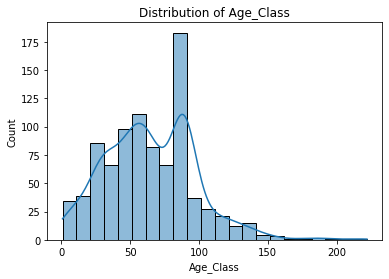

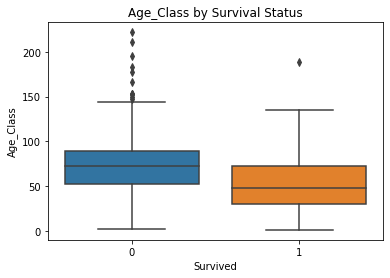

In [46]:
# Plotting the distribution
sns.histplot(titanic_data['Age_Class'], kde=True)
plt.title('Distribution of Age_Class')
plt.show()

# Investigating the relationship with Survival
sns.boxplot(x='Survived', y='Age_Class', data=titanic_data)
plt.title('Age_Class by Survival Status')
plt.show()

- **Explanation:**
The histogram provides a distribution view of the new `Age_Class` feature. From the box plot, we can gather insights regarding the relationship between the `Age_Class` feature and survival status. It might be observed that different `Age_Class` values have varying survival rates, indicating the potential utility of this feature for predicting survival.

- **Key Insights:**

    - The `Age_Class` feature creates a spectrum where younger passengers in higher classes (like 1st class) might have lower values, and older passengers in lower classes (like 3rd class) might have higher values.
    - By examining the relationship between `Age_Class` and survival, one could infer whether socio-economic factors, combined with age, had a noticeable impact on survival chances. 
    - Interaction features like `Age_Class` can sometimes enhance a model's performance, especially when the interaction provides meaningful context not captured by the individual features.

After creating the 'AgeClass' variable, it's essential to note that introducing new variables or features can unlock deeper insights from the data. Constructing relevant and meaningful features allows algorithms to better discern patterns, enhancing model performance. The power of machine learning doesn't just lie in complex algorithms, but significantly in the quality of the features provided to them.


- **Key Insights on Feature Creation:**

1. **Relevance:** Ensure the new feature captures meaningful patterns and contributes to the prediction task.
2. **Simplicity:** It's often better to start with simpler features and then iterate, rather than beginning with overly complex ones.
3. **Avoid Redundancy:** Ensure new features aren't just replicating the information of existing ones.
4. **Test and Validate:** Always evaluate the model's performance with the new feature to ascertain its value.

Remember, the goal is to enhance model performance and interpretability without adding unnecessary complexity.

---